# Dask Flood Mapper

In [1]:
import sys
import os
from pathlib import Path

src_path = Path(os.getcwd()).resolve().parent / "src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

print(f"Added {src_path} to sys.path")

Added /home/tsarinho/Repos/dask-flood-mapper/dask-flood-mapper/src to sys.path


In [2]:
from flood.decision import flood_decision


ImportError: cannot import name 'process_wcover_data' from 'flood.processing' (/home/tsarinho/Repos/dask-flood-mapper/dask-flood-mapper/src/flood/processing.py)

In [8]:
time_range = "2022-10-11/2022-10-25"
bbox= [12.3, 54.3, 13.1, 54.6]
fd=flood_decision(bbox= bbox, datetime=time_range)
fd

sig0_dc processed
hpar_dc processed
plia_dc processed
wcover_dc processed


<xarray.DataArray 'decision' (time: 6, latitude: 1668, longitude: 4445)> Size: 356MB
dask.array<where, shape=(6, 1668, 4445), dtype=float64, chunksize=(1, 1302, 1302), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 13kB 54.6 54.6 54.6 54.6 ... 54.3 54.3 54.3
  * longitude    (longitude) float64 36kB 12.3 12.3 12.3 12.3 ... 13.1 13.1 13.1
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 48B 2022-10-11T05:25:01 ... 2022-10-23...

In [9]:
count_ones = (fd == 1).sum().compute().item()
count_zeros = (fd == 0).sum().compute().item()
count_nans = fd.isnull().sum().compute().item()  

print(f"Number of 1s: {count_ones}")
print(f"Number of 0s: {count_zeros}")
print(f"Number of NaNs: {count_nans}")

Number of 1s: 94490
Number of 0s: 10106195
Number of NaNs: 34284875


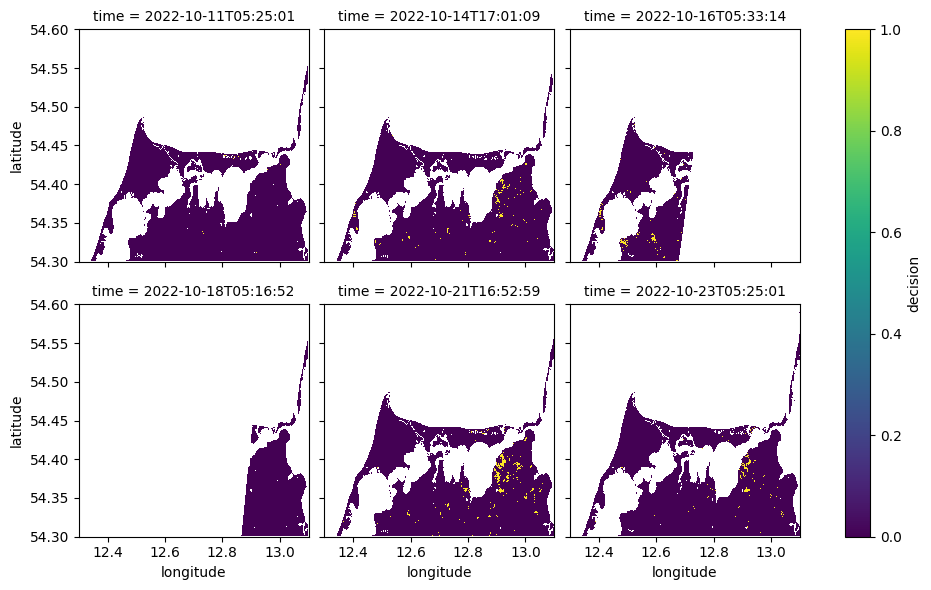

In [ ]:
fd.plot(col="time", col_wrap=3)